In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(ride, city, on="city", how="left")

# Display the data table for preview
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


NameError: name 'typelist' is not defined

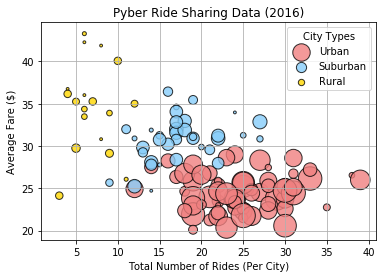

In [15]:
# Obtain the x and y coordinates for each of the three city types
grouped = merged.groupby(['type','city'])
x = grouped['ride_id'].count()
y = grouped['fare'].mean()
dcount = grouped['driver_count'].mean() # average driver count per city calculated for use in scatter size (s)


# Build the scatter plots for each city types
types = merged['type'].unique()
colors = ['lightcoral', 'lightskyblue', 'gold']
cl_dict = {} # initializing dictionary corresponding colors to types
c = 0

for type in types:
    plt.scatter(x.loc[type,:], y.loc[type,:], facecolors=colors[c], edgecolors='black', label=type,
                s=dcount[type]*8, alpha=0.8, linewidths=1)
    
    cl_dict[type] = colors[c] # build dictionary assigning colors to types for future use
    
    c = (c + 1)%len(colors) 
    # with mod 3 if we had more than 3 types the colors would loop back to the first one 'lightcoral'. 
    # In such occasion it's probably more useful to add more colors to the list, but currently not needed.

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title='City Types')

for i in range(len(typelist)): # Adjust the marker sizes to be equal to each other in the legend
    legend.legendHandles[i]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nScatter size correlates with driver count per day")


In [5]:
# Show plot
plt.show()

(-1.116703110300783,
 1.1972665181295887,
 -1.1123788195269562,
 1.1610996706073955)

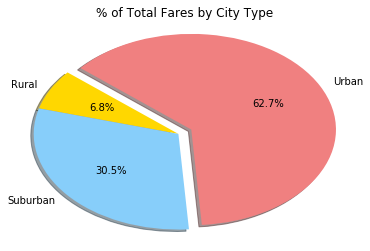

In [7]:
# Calculate Type Percents
fare_percent = merged.groupby(['type'])['fare'].sum()/merged['fare'].sum()
types = fare_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]

# Build Pie Chart
plt.pie(fare_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1), shadow=True)
plt.title("% of Total Fares by City Type")
plt.axis("tight")


In [8]:
# Show Figure
plt.show()

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

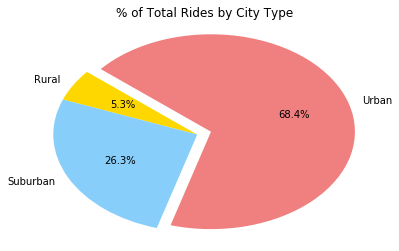

In [10]:
# Calculate Ride Percents
ride_percent = merged.groupby(['type'])['ride_id'].count()/merged['ride_id'].count()
types = ride_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]
    
# Build Pie Chart
plt.pie(ride_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=140, explode=(0, 0, 0.1))
plt.title("% of Total Rides by City Type")
plt.axis("tight")



In [11]:
# Show Figure
plt.show()

(-1.120699785518725,
 1.2075338043154697,
 -1.0809966533017417,
 1.1293149189816225)

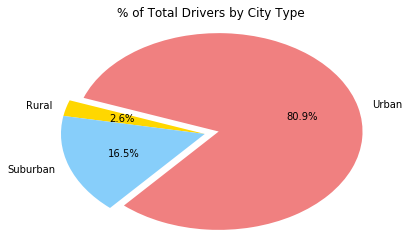

In [13]:
# Calculate Driver Percents
driver_percent = city.groupby(['type'])['driver_count'].sum()/city['driver_count'].sum()
types = driver_percent.index.values # new order of types for the pie

colors=[] # reset color order to correspond to previous color coding
colors += [cl_dict[type] for type in types]
 
# Build Pie Charts
plt.pie(driver_percent, labels=types, colors=colors, autopct="%1.1f%%", startangle=160, explode=(0, 0, 0.1))
plt.title("% of Total Drivers by City Type")
plt.axis("tight")


In [14]:
# Show Figure
plt.show()